# Requirement

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tsflw
import h5py as h5
import xmljson as xml
import scipy as sp
#import scikit-learn as sktl
import tqdm as tq
import xarray as xa
import seaborn as sb
import openpyxl as opyx

print("numpy : ",np.__version__, "doit etre >= 1.14.3")
print("pandas : ",pd.__version__, "doit etre >= 0.22") #PPPPPPPPPPPPPRRRRRRRRRRRROOOOOOOOOOBBBBBBBBBBLLLLLLLLMMMMMMMMMM
print("tensorflow: ",tsflw.__version__, "doit etre = 2.2")
print("h5py: ",h5.__version__, "doit etre >= 2.8")
print("xmljson : ",xml.__version__, "doit etre >= 0.1.9")
print("scipy : ",sp.__version__, "doit etre >= 1.1")
#print("scikit-learn: ",sktl.__version__, "doit etre >= 0.20")
print("tqdm : ",tq.__version__, "doit etre >= 4.26")
print("xarray : ",xa.__version__, "doit etre >= 0.11.2")
print("seaborn : ",sb.__version__, "doit etre >= 0.9")
print("openpyxl : ",opyx.__version__, "doit etre >= 3.0")

2021-11-03 11:17:49.355744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-03 11:17:49.355814: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


numpy :  1.19.5 doit etre >= 1.14.3
pandas :  1.3.4 doit etre >= 0.22
tensorflow:  2.6.1 doit etre = 2.2
h5py:  3.1.0 doit etre >= 2.8
xmljson :  0.2.1 doit etre >= 0.1.9
scipy :  1.7.1 doit etre >= 1.1
tqdm :  4.62.3 doit etre >= 4.26
xarray :  0.19.0 doit etre >= 0.11.2
seaborn :  0.11.2 doit etre >= 0.9
openpyxl :  3.0.9 doit etre >= 3.0


# Test du git

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Etude des données du jeu d'entrainement

Ouverture du fichier 'ecg_tracings.hdf5' contenant un seul jeu de données nommé tracings. Cet ensemble de données est un tenseur (827, 4096, 12). La première dimension correspond aux 827 examens différents de différents patients ; la deuxième dimension correspond aux 4096 échantillons de signal ; la troisième dimension aux 12 dérivations différentes des examens ECG dans l'ordre suivant : {DI, DII, DIII, AVL, AVF, AVR, V1, V2, V3, V4, V5, V6}.

In [3]:
import h5py
path = "data/"
with h5py.File(path+'ecg_tracings.hdf5', "r") as f:
    x = np.array(f['tracings'])
print(x.shape)

(827, 4096, 12)


Ouverture du fichier 'attributes.csv' qui contient les attributs de base du patient : sexe (M ou F) et âge. Il contient 827 lignes (plus l'en-tête). Le i-ème tracé dans ecg_tracings.hdf5 correspond à la i-ème ligne.

In [4]:
path = "data/"
attribute = pd.read_csv(path+'attributes.csv')
print(attribute.shape)
display(attribute.head())

(827, 2)


,age,sex
0,34,M
1,70,F
2,52,F
3,41,F
4,32,F


Ouverture du fichier 'cardiologist1.csv' qui contient des annotations du premier cardiologue.

In [5]:
path = "data/annotations/"
cardio1 = pd.read_csv(path+'cardiologist1.csv')
print(cardio1.shape)
display(cardio1.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'cardiologist2.csv' qui contient des annotations du deuxième cardiologue.

In [6]:
path = "data/annotations/"
cardio2 = pd.read_csv(path+'cardiologist2.csv')
print(cardio2.shape)
display(cardio2.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'dnn.csv' qui contient les prédiction à partir du réseau de neurones profonds décrit dans "Diagnostic automatique de l'ECG de courte durée à 12 dérivations à l'aide d'un réseau de neurones profonds". Le seuil est fixé de manière à maximiser le score F1.

In [7]:
path = "data/annotations/"
dnn = pd.read_csv(path+'dnn.csv')
print(dnn.shape)
display(dnn.head())

(827, 7)


,Unnamed: 0,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,0


Ouverture du fichier 'cardiology_residents.csv' qui contient les annotations de deux résidents en cardiologie de 4e année (chacun annoté la moitié de l'ensemble de données).

In [8]:
path = "data/annotations/"
cardio_resident = pd.read_csv(path+'cardiology_residents.csv')
print(cardio_resident.shape)
display(cardio_resident.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'emergency_residents.csv' qui contient les annotations de deux résidents d'urgence de 3e année (chacun annoté la moitié de l'ensemble de données).

In [9]:
path = "data/annotations/"
emerg_resident = pd.read_csv(path+'emergency_residents.csv')
print(emerg_resident.shape)
display(emerg_resident.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'medical_students.csv' qui contient les annotations de deux étudiants en médecine de 5e année (chacun annoté la moitié de l'ensemble de données).

In [10]:
path = "data/annotations/"
med_student = pd.read_csv(path+'medical_students.csv')
print(med_student.shape)
display(med_student.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'gold_standard.csv' contenant les annotation d'étalon-or pour cet ensemble de données de test. Lorsque le cardiologue 1 et le cardiologue 2 étaient d'accord, le diagnostic commun était considéré comme le gold standard. En cas de désaccord, un troisième spécialiste principal, au courant des annotations des deux autres, décidait du diagnostic.

In [11]:
lead_order = ["DI", "DII", "DIII", "AVL", "AVF", "AVR", "V1", "V2", "V3", "V4", "V5", "V6"]
path = "data/annotations/"
df_goldStandard = pd.read_csv(path+'gold_standard.csv')
df_goldStandard['nb_abnormality'] =  df_goldStandard.sum(axis=1)
print(df_goldStandard.shape)
display(df_goldStandard.head(20).T)

(827, 7)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1dAVb,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
RBBB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LBBB,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
SB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nb_abnormality,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,0


In [12]:
df_goldStandard.describe()

,1dAVb,RBBB,LBBB,SB,AF,ST,nb_abnormality
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.033857,0.041112,0.036276,0.019347,0.015719,0.044740,0.191052
std,0.180971,0.198670,0.187088,0.137825,0.124463,0.206858,0.428712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Visualisation des cardiogramme de 5 patient qui n'ont pas d'annomalies.

1dAVb 0
RBBB 1
LBBB 2
SB 3
AF 4
ST 5


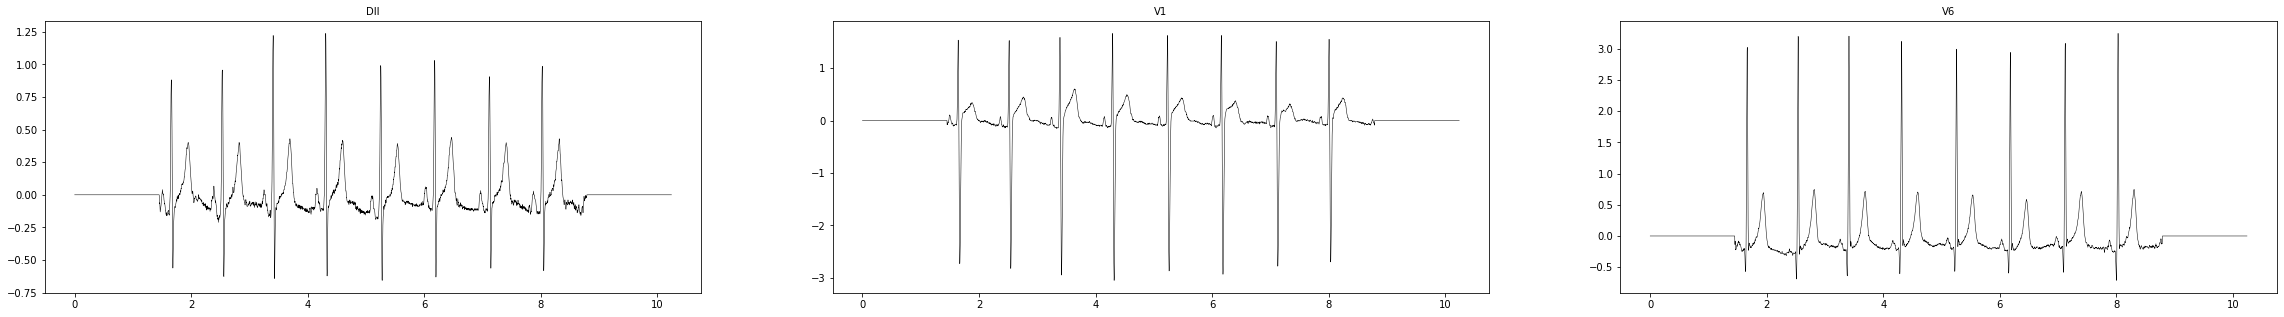

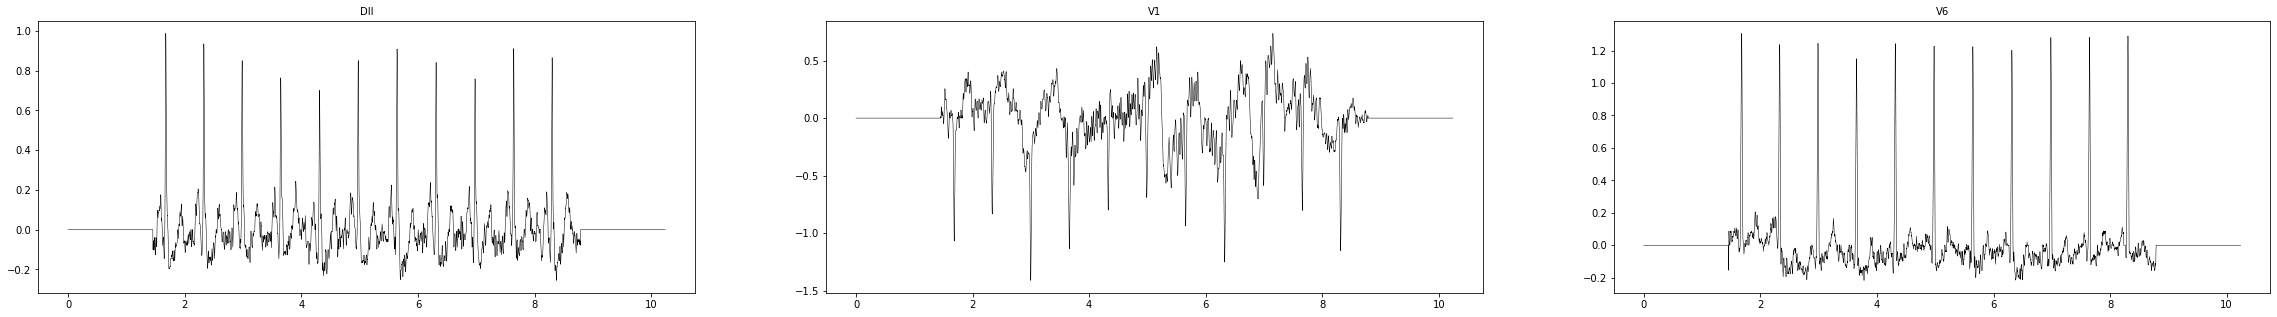

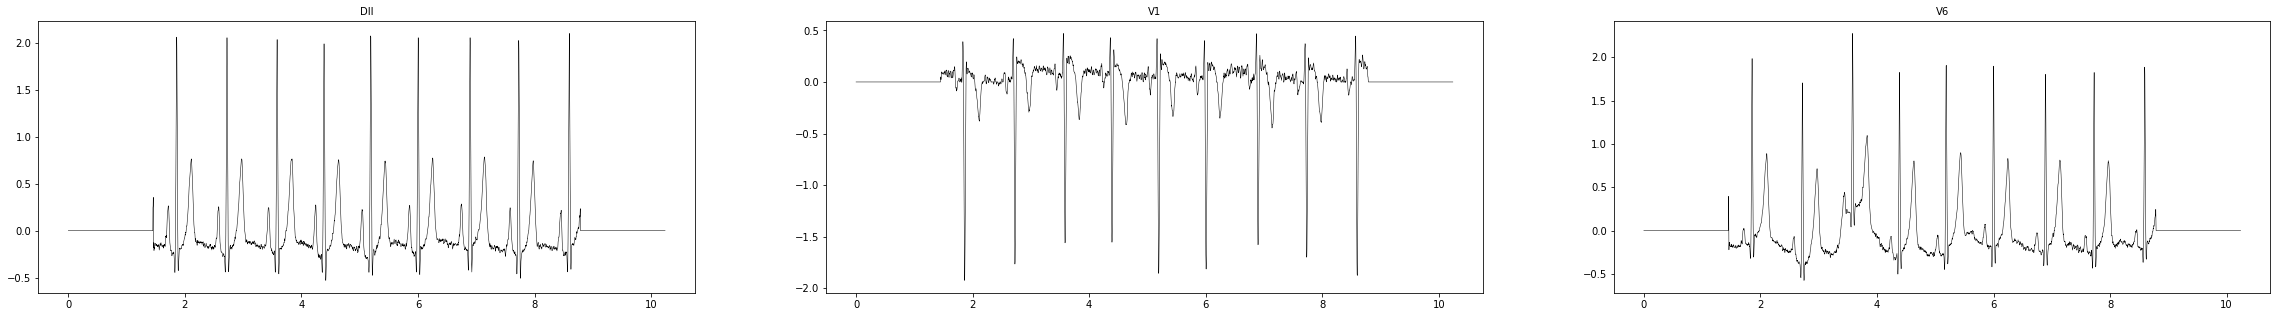

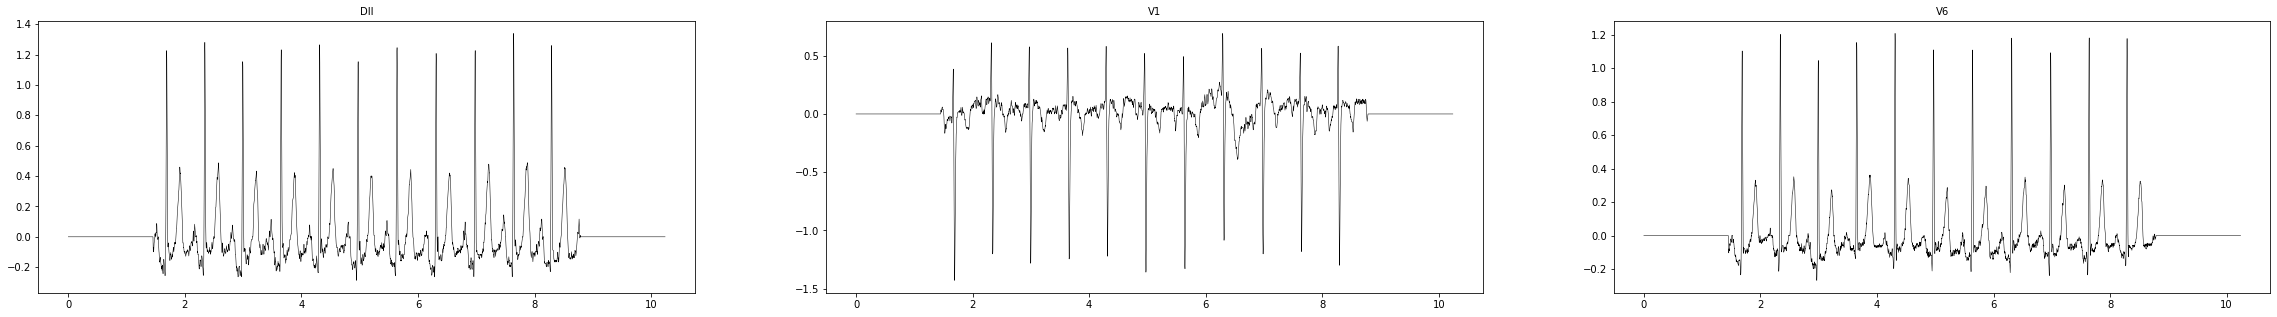

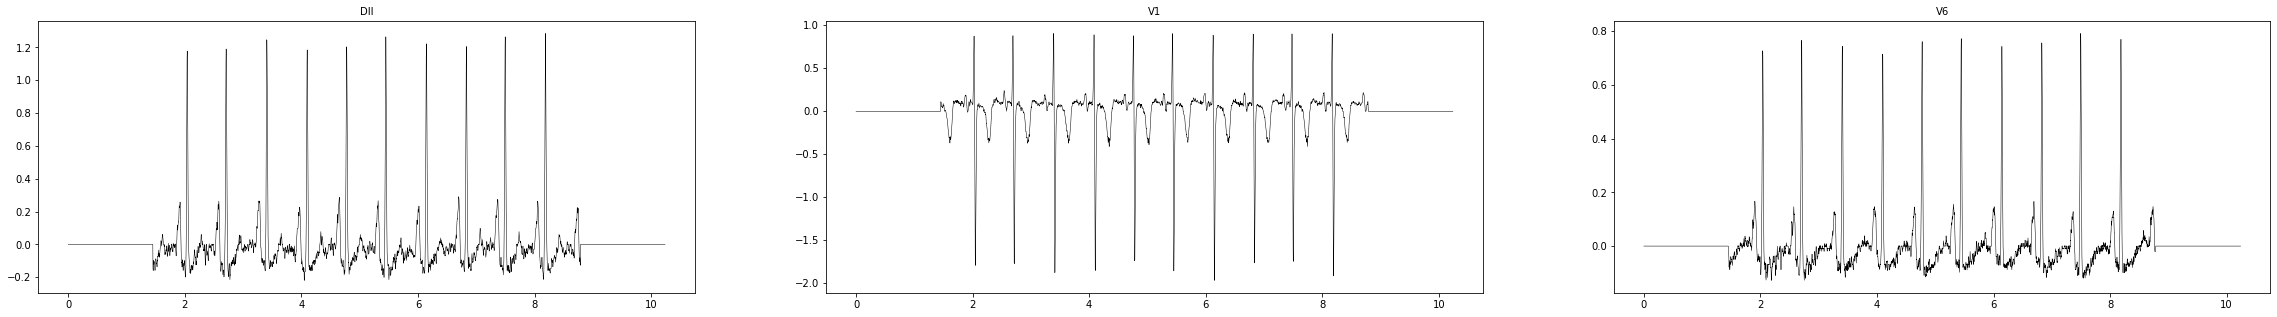

In [13]:
for idx_abn, abnormality in enumerate(df_goldStandard.columns[:-1]):
    print(abnormality,idx_abn)
    
# visualisation a refaire en mieux
for idx_safe in df_goldStandard[df_goldStandard.nb_abnormality==0].index[:5]: #indice des gens qui ont un cardio safe
    fig, axs = plt.subplots(1, 3,figsize=(40,5))
    for i,pos in enumerate([1,6,11]):
        ax = axs[i]
        ax.set_title(lead_order[pos],fontsize=10)
        ax.plot(np.linspace(0,10.24,4096),x[idx_safe,:,pos],'k', linewidth=.5)
    plt.show()

Visualisation des cardiogrammes des patient qui ont une anomalie.

1dAVb  : 


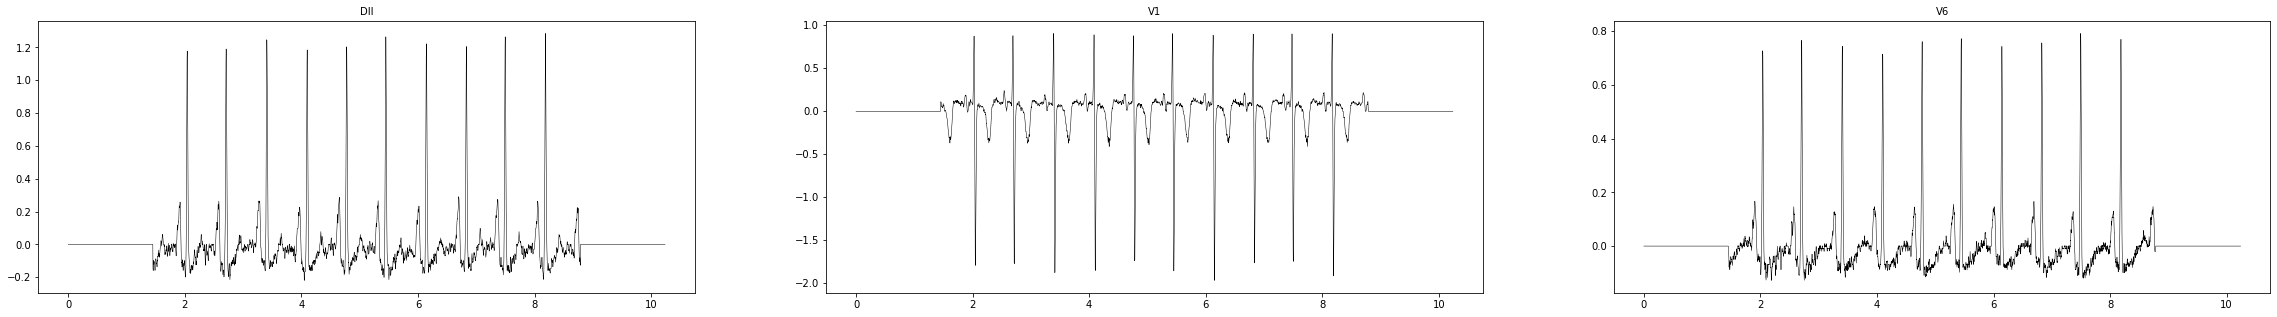

RBBB  : 


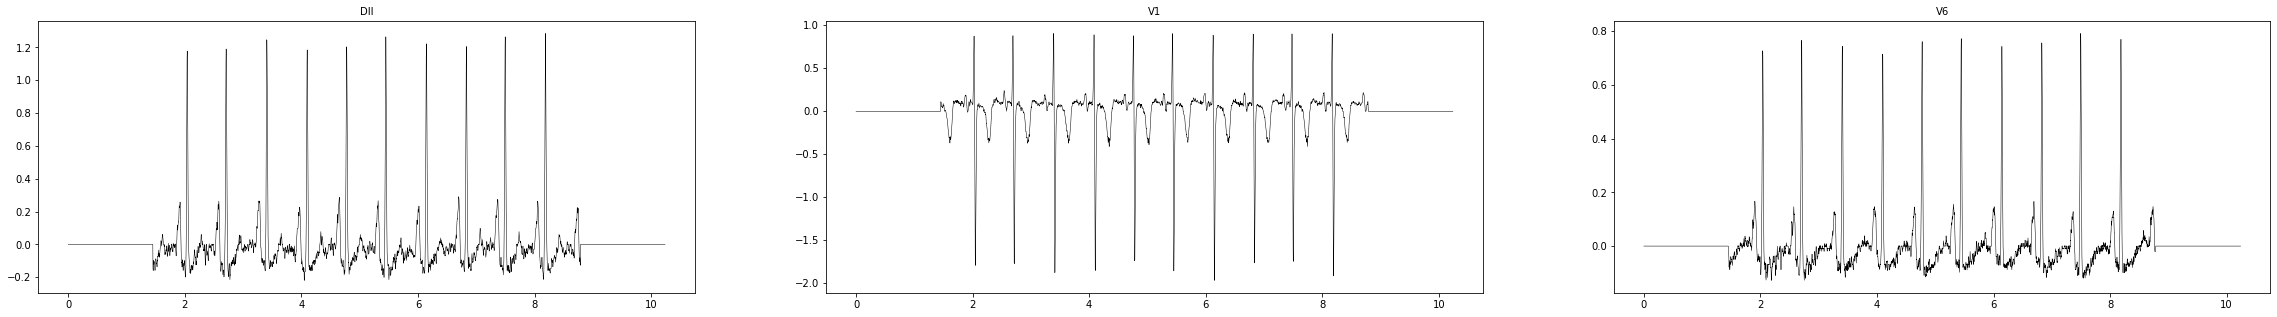

LBBB  : 


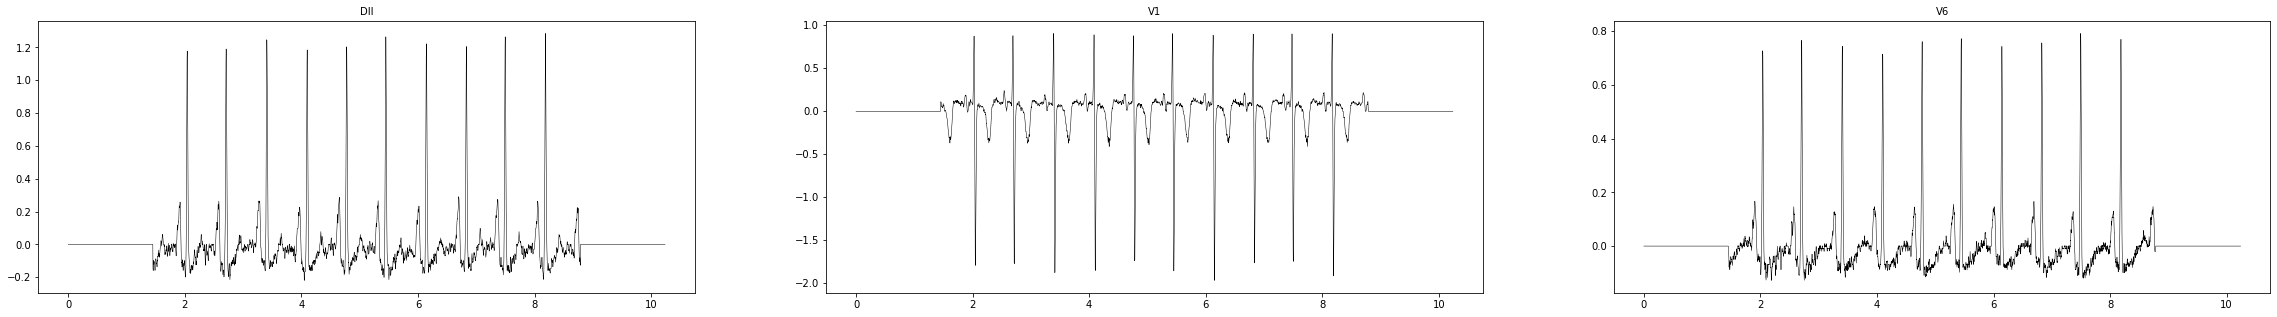

SB  : 


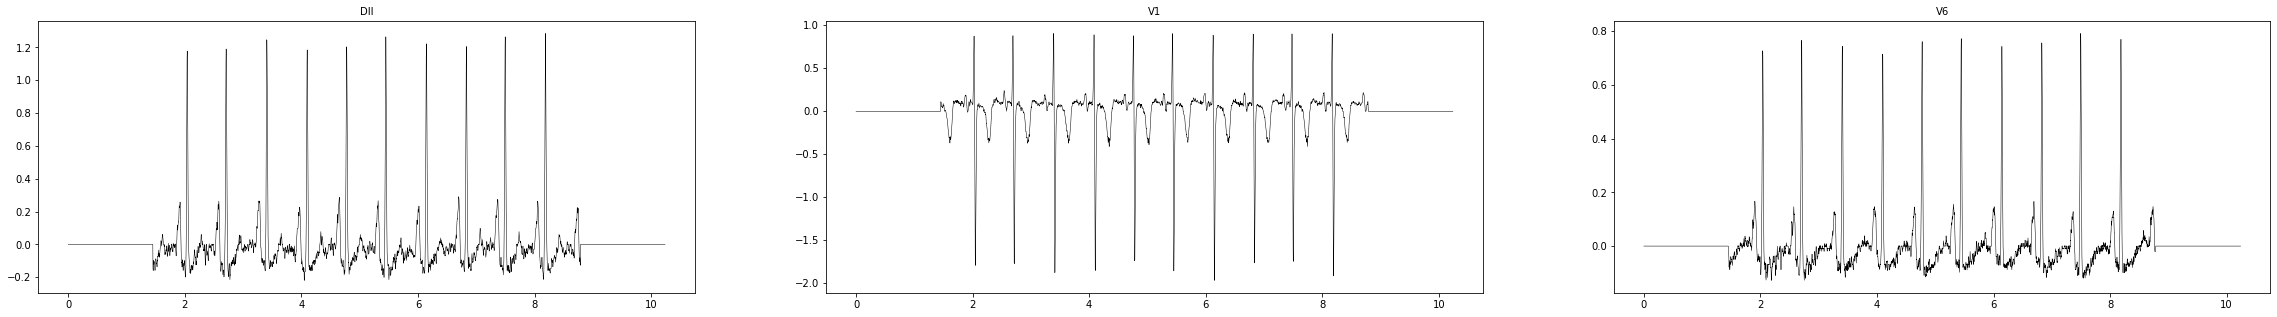

AF  : 


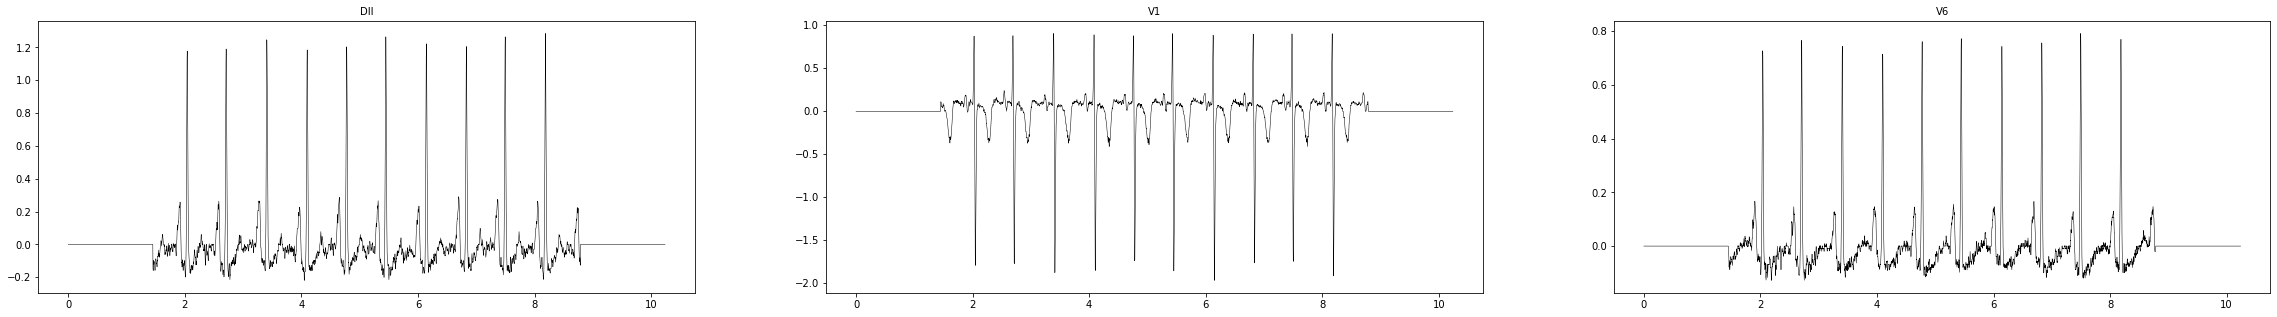

ST  : 


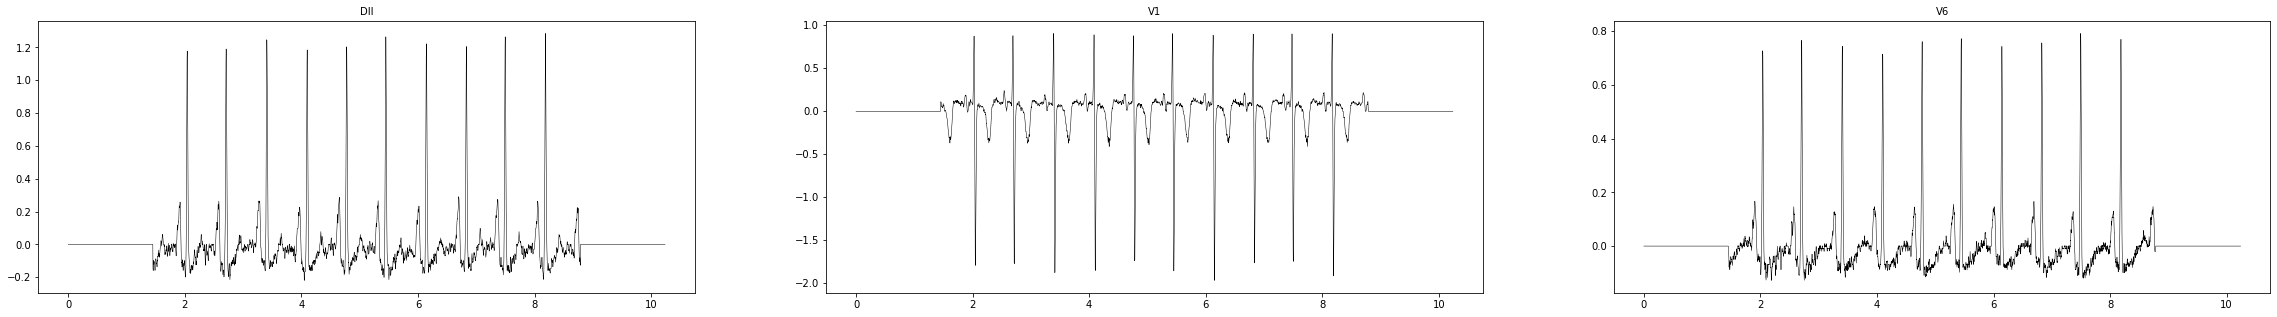

In [14]:
list_abnormality = ["1dAVb", "RBBB", "LBBB", "SB", "AF", "ST"]
for abnormality in list_abnormality :
    print(abnormality, ' : ')
    for idx_anomal in df_goldStandard[(df_goldStandard[abnormality]==1)&(df_goldStandard.nb_abnormality==1)].index[:1] : #trouve l'indice ou le patient a l'anomalie
        fig, axs = plt.subplots(1, 3,figsize=(40,5))
        for i,pos in enumerate([1,6,11]):
            ax = axs[i]
            ax.set_title(lead_order[pos],fontsize=10)
            ax.plot(np.linspace(0,10.24,4096),x[idx_safe,:,pos],'k', linewidth=.5)
        plt.show()

Pourcentage de patient sans anomalie et atteind d'une certaine anomalie.

In [15]:
#Patient sans anomalie
nb_patient = (df_goldStandard.nb_abnormality==0).sum()
print(nb_patient*100/827,'% de patient sans anomalie')

#Patient avec anomalie
list_abnormality = ["1dAVb", "RBBB", "LBBB", "SB", "AF", "ST"]
for abnormality in list_abnormality :
    nb_patient = df_goldStandard[abnormality].sum()
    print(nb_patient*100/827,'% de patient atteind de ', abnormality)

82.34582829504232 % de patient sans anomalie
3.3857315598548974 % de patient atteind de  1dAVb
4.111245465538089 % de patient atteind de  RBBB
3.6275695284159615 % de patient atteind de  LBBB
1.9347037484885128 % de patient atteind de  SB
1.5719467956469166 % de patient atteind de  AF
4.474002418379686 % de patient atteind de  ST


maladie en fonction de l'age

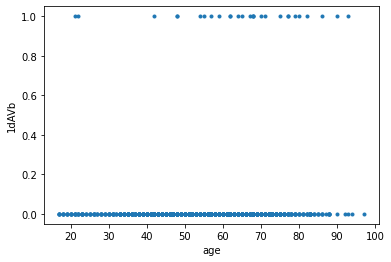

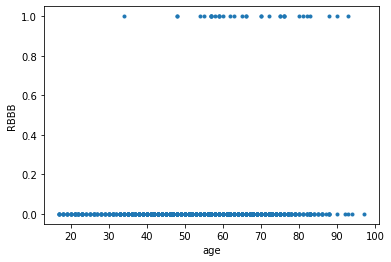

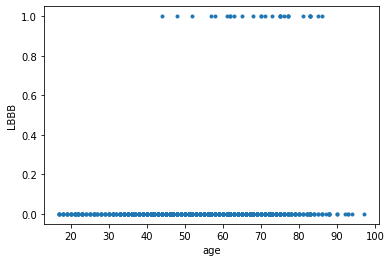

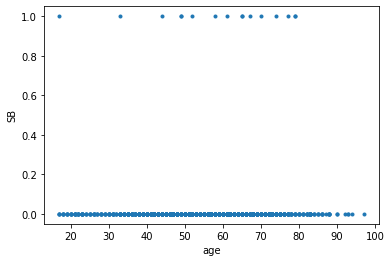

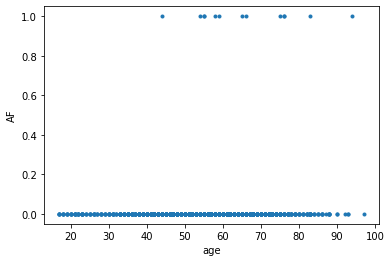

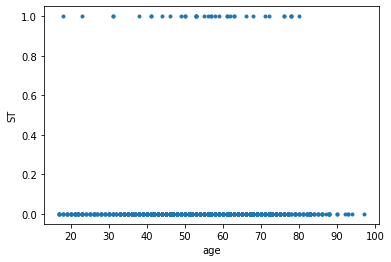

In [17]:
list_abnormality = ["1dAVb", "RBBB", "LBBB", "SB", "AF", "ST"]
at = attribute["age"]
for index, abnormality in enumerate (list_abnormality) :
    mal = df_goldStandard[abnormality]
    plt.plot(at,mal,'.')
    plt.xlabel("age")
    plt.ylabel(abnormality)
    plt.show()

Nombre de malade en fonction age

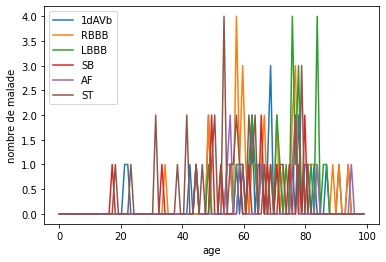

In [20]:
at_age = attribute["age"]
list_abnormality = ["1dAVb", "RBBB", "LBBB", "SB", "AF", "ST"]

for index, abnormality in enumerate (list_abnormality) :
    tab_age = np.zeros((99))
    for age in range (98):
        tab = []
        for i in range(827):
            if at_age[i] == age :
                tab.append(i)
        #print(tab) 
        if tab != []:
            compt = 0
            for j in range (len(tab)):
                if (df_goldStandard[abnormality][tab[j]] == 1):
                    compt = compt+1
            tab_age[age] = compt
    x = np.linspace(0,99,99)
    plt.plot(x,tab_age)
    plt.legend(list_abnormality)
plt.xlabel("age")
plt.ylabel("nombre de malade")
plt.show()

Nombre de malade en fonction sex

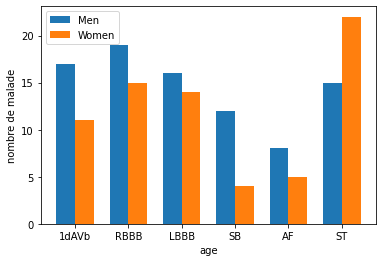

In [21]:
at_sex = attribute["sex"]
list_abnormality = ["1dAVb", "RBBB", "LBBB", "SB", "AF", "ST"]

men_means = []
women_means = []
for index, abnormality in enumerate (list_abnormality) :
    tab_sex = np.zeros((2))
    for sex in ["M","F"]:
        tab = []
        for i in range(827):
            if at_sex[i] == sex :
                tab.append(i)
        #print(tab) 
        if tab != []:
            compt = 0
            for j in range (len(tab)):
                if (df_goldStandard[abnormality][tab[j]] == 1):
                    compt = compt+1
        if sex == "M":
            tab_sex[0] = compt
        if sex == "F":
            tab_sex[1] = compt
    men_means.append(tab_sex[0])
    women_means.append(tab_sex[1])
x = np.arange(len(list_abnormality))
width = 0.35
fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
plt.xlabel("age")
plt.ylabel("nombre de malade")
ax.set_xticks(x)
ax.set_xticklabels(list_abnormality)
ax.legend()
plt.show()

### Utilisation du réseau de neurones pour prévoir les anomalies (pathologies cardiaques)

Exécution du programme 'predict.py' pour tester le modele modele.hdf5. Renvoie un fichier dnn_output.npy. 

In [22]:
%run -i  'predict.py' 'data/ecg_tracings.hdf5' 'dnn_predicts_hdf5/other_seeds/model_2.hdf5' --output_file 'outputs/'

2021-11-03 11:19:51.972619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-03 11:19:51.972677: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-03 11:19:51.972740: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2021-11-03 11:19:51.972956: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-03 11:19:52.604382: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimiz

 1/26 [>.............................] - ETA: 21s

2021-11-03 11:19:53.468500: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 33554432 exceeds 10% of free system memory.
2021-11-03 11:19:53.510470: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 67108864 exceeds 10% of free system memory.


 2/26 [=>............................] - ETA: 21s

2021-11-03 11:19:54.348882: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 33554432 exceeds 10% of free system memory.


26/26 [==============================] - 16s 622ms/step
Output predictions saved


Exucution du programme 'generate_figures_and_tables.py' qui génère des figures et des tableaux à partir de l'article "Automatic Diagnosis o the Short-Duration12-Lead ECG using a Deep Neural Network". C'est-à-dire ......................................................................................................................................

Faire du blabla !!!!!

Micro average precision
[0.94566453 0.94992158 0.95002866 0.950871   0.95182224 0.95380942
 0.95557086 0.95785818 0.95960438 0.96081937]
                                           1dAVb      RBBB      LBBB  \
DNN vs Cert. cardiol. 1                 0.757884  0.928350  0.964266   
DNN vs Certif. cardiol. 2               0.852163  0.941924  1.000000   
Cert. cardiol. 1 vs Certif. cardiol. 2  0.741285  0.954629  0.964266   

                                              SB        AF        ST  
DNN vs Cert. cardiol. 1                 0.769995  0.696328  0.846727  
DNN vs Certif. cardiol. 2               0.769995  0.746423  0.883848  
Cert. cardiol. 1 vs Certif. cardiol. 2  0.843697  0.830948  0.902492  
normal_order
date_order
individual_patients
base_model


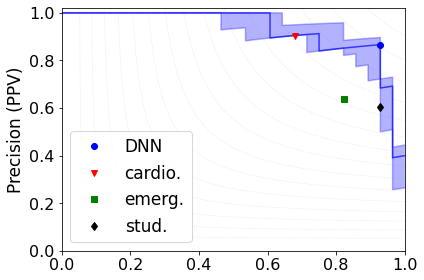

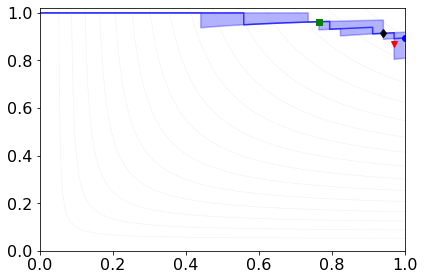

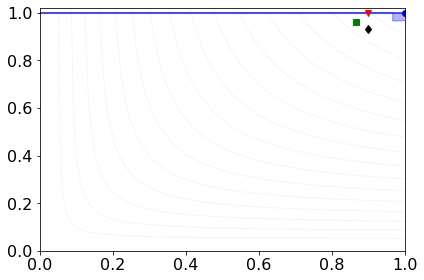

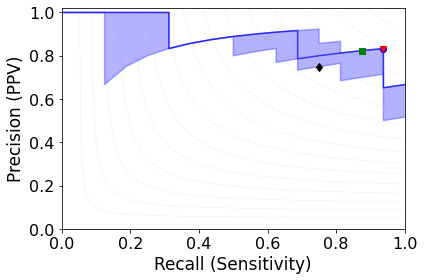

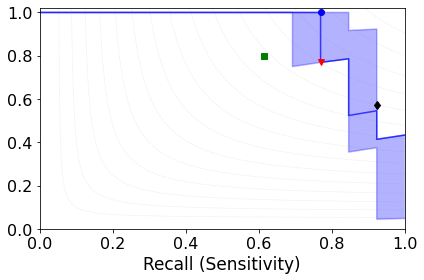

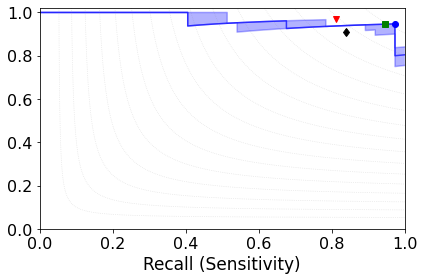

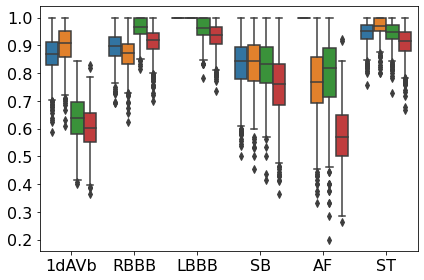

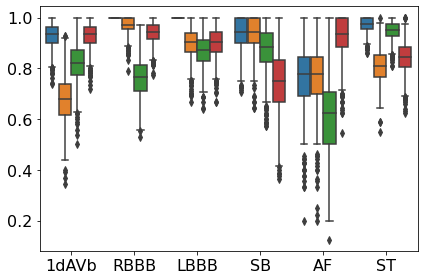

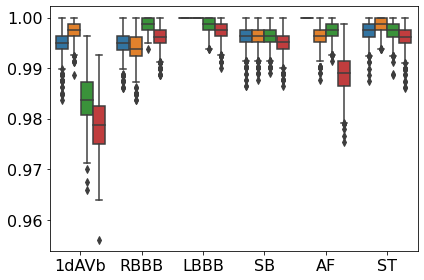

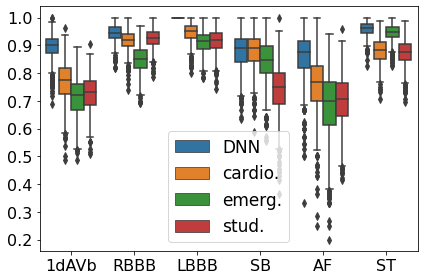

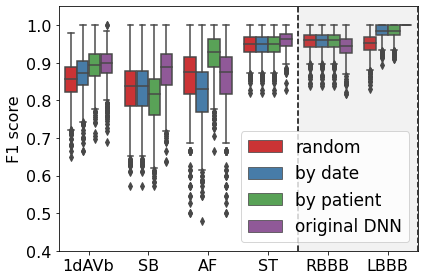

In [23]:
%run -i 'generate_figures_and_tables.py'

Exécution du programme 'model.py' qui permet l'implémentation de l'architecture de réseau neuronal dans Keras. Le modèle utilisé dans l'article est un neurone résiduel. Le modèle reçoit un tenseur d'entrée de dimension (N, 4096, 12) et renvoie un tenseur de sortie de dimension (N, 6), pour lequel N est la taille du lot.

In [24]:
%run -i 'model.py'

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
signal (InputLayer)             [(None, 4096, 12)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4096, 64)     12288       signal[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4096, 64)     256         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 4096, 64)     0           batch_normalization[0][0]        
______________________________________________________________________________________________

### Evaluation de la performance de notre classifieur

In [25]:
path = "dnn_predicts/"
model = np.load(path+"model.npy")
print(model.shape)
print(model)

(827, 6)
[[1.4007092e-06 1.1920929e-07 2.6822090e-07 4.7683716e-07 8.6426735e-07
  0.0000000e+00]
 [2.8897256e-02 2.0067096e-03 3.1778657e-01 2.8282404e-05 4.8343629e-02
  3.2052398e-04]
 [3.1128526e-04 2.9355288e-05 4.1425228e-06 1.9729137e-05 9.3490183e-03
  2.4914742e-05]
 ...
 [5.3644180e-07 2.9802322e-08 5.9604645e-08 0.0000000e+00 9.5367432e-07
  0.0000000e+00]
 [8.9406967e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.7332050e-01 2.4566352e-03 8.6039305e-05 4.6342611e-05 2.0524128e-03
  7.2768446e-05]]
